In [6]:
# "Building a State Space Maze Search in Python : DFS"
> "Solving Maze Puzzles with python and matplotlib"

- author: Bhargav Lad
- toc: true 
- badges: true
- comments: true
- image: images/maze.png
- categories: [ jupyter,matplotlib,DFS,Maze-solving]

SyntaxError: invalid syntax (<ipython-input-6-16c51b400e43>, line 2)


In this notebook we will use depth first search(DFS) to find solution for the given Maze.
We will start by importing the libraries required for the code.

- `clear_output` -  used to clear cell output
- `matplotlib.pyplot` - use to plot the maze path
- `%matplotlib inline` - to properly format matplotlib output inside jupyter notebook

In [1]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

We will start by reading the maze file and reading it into python list with preprocessing

here we will substitue % and . with number so that matplotlib can correcly render the maze

- `%` is substituted as `0`
- `  ` is substituted as `2`


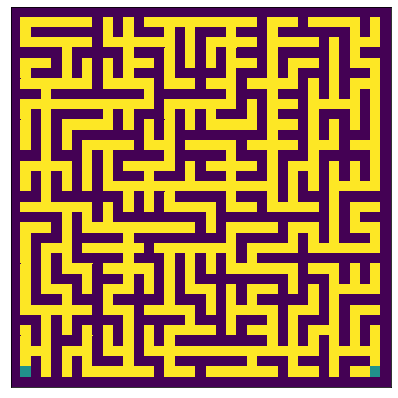

In [2]:
file_name = "BigMaze.txt"
maze = []
start = None
stop = None
with open(file_name, 'r') as file:
    for i,line in enumerate(file):
        line = line.rstrip()
        row = []
        for j,c in enumerate(line):
            if c=='P':
                start = (i,j)  # start
                row.append(1)
            elif c=='.':
                stop = (i,j)  # stop
                row.append(1)
            elif c == '%':
                row.append(0) #  % are 0s
            else:
                row.append(2) #  spaces are 1s
        maze.append(row)

ROW = len(maze)
COL = len(maze[0])

fig,ax = plt.subplots(figsize=(7,7))   
ax.pcolor(maze)
ax.set_xticks([]) # remove the tick marks by setting to an empty list
ax.set_yticks([]) # remove the tick marks by setting to an empty list
ax.set_aspect('equal')
ax.invert_yaxis() #invert the y-axis so the first row of data is at the top 

In [3]:
import copy
copy_maze = copy.deepcopy(maze)

In [4]:
ROW,COL

(37, 37)

# Psuedo Code of DFS
```
      DFS(G,v)   ( v is the vertex where the search starts )
         Stack S := {};   ( start with an empty stack )
         for each vertex u, set visited[u] := false;
         push S, v;
         while (S is not empty) do
            u := pop S;
            if (not visited[u]) then
               visited[u] := true;
               for each unvisited neighbour w of u
                  push S, w;
            end if
         end while
      END DFS()
```
source: http://www.cs.toronto.edu/~heap/270F02/node36.html

Here they have described an iterative implementation but I will implement in recursive way which is much easier to code.

In [5]:
def DFS(maze,start,stop,WALL):
    visited = set() # visited set so that we do not visist them again
    parent = dict() # contains parent of each cell from which it is visited
    
    visited.add(start) # add start to visited
    parent[start]=start  # make start as parent of itself because it is source cell
    SZ=7 # size of plot
    
    def _dfs(f):
        clear_output(wait=True)  # clear previous output
        
        # mark f as visited
        visited.add(f)
        
        # Code to display visited cell
        copy_maze[f[0]][f[1]]=1;  # 
        fig,ax = plt.subplots(figsize=(SZ,SZ)) 
        ax.pcolor(copy_maze)
        ax.set_xticks([]) # remove the tick marks by setting to an empty list
        ax.set_yticks([]) # remove the tick marks by setting to an empty list
        ax.set_aspect('equal') # same aspect ratio for X and Y
        ax.invert_yaxis() #invert the y-axis so the first row of data is at the top 
        plt.show()
        
                
        # get all the 4 neighbours of f
        top = (f[0]-1,f[1]+0)
        bottom = (f[0]+1,f[1]+0)
        left = (f[0]+0,f[1]-1)
        right = (f[0]+0,f[1]+1)
        
        # if f is the destination vertex we are done
        if f==stop:
            print("Found Path")
            return True
        
        # visit the valid neighbours that are not yet visited
        for pos in [top,bottom,left,right]:
            if -1<pos[0]<ROW and -1<pos[1]<COL and maze[pos[0]][pos[1]]!=WALL and pos not in visited:
                parent[pos]=f
                if _dfs(pos) == True:
                    return True
                
        # if no path found
        return False
      
    _dfs(start)
    
    # code to get the actual path
    p = stop
    path = [p]
    while parent[p]!=p:
        p = parent[p]
        path.append(p)
        
    return path



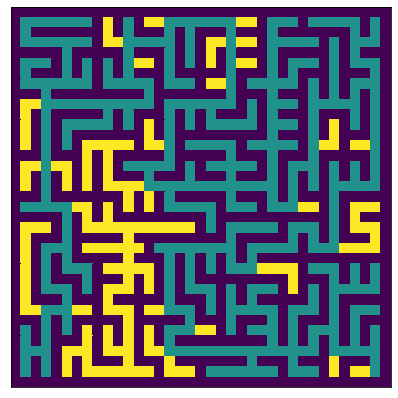

Found Path


In [6]:
# call the function to get the path
dfs_path = DFS(maze,start,stop,0)

In [7]:
# mark the path with 1 in maze
for p in dfs_path:
    maze[p[0]][p[1]]=1

Text(0.5, 1.0, 'Final DFS Path')

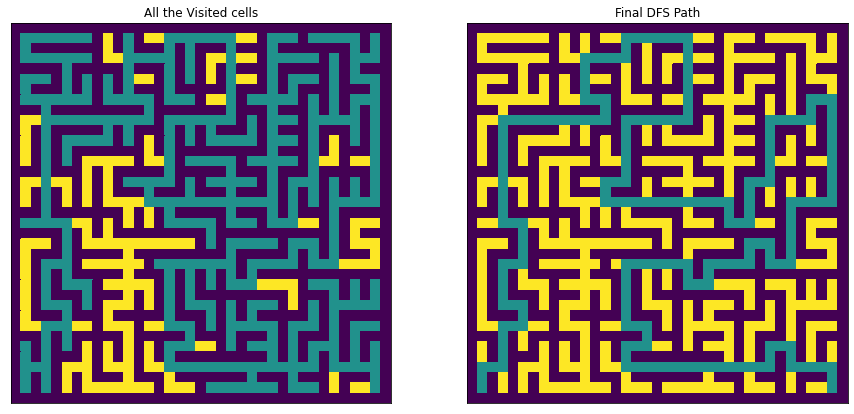

In [8]:
# fig,ax = plt.subplots(1,1,figsize=(SZ,SZ))  
SZ=15
fig,ax = plt.subplots(1,2,figsize=(SZ,SZ))   
ax[0].pcolor(copy_maze)
ax[0].set_xticks([]) # remove the tick marks by setting to an empty list
ax[0].set_yticks([]) # remove the tick marks by setting to an empty list
ax[0].set_aspect('equal')
ax[0].invert_yaxis() #invert the y-axis so the first row of data is at the top 
ax[0].set_title("All the Visited cells")

ax[1].pcolor(maze)
ax[1].set_xticks([]) # remove the tick marks by setting to an empty list
ax[1].set_yticks([]) # remove the tick marks by setting to an empty list
ax[1].set_aspect('equal')
ax[1].invert_yaxis() #invert the y-axis so the first row of data is at the top 
ax[1].set_title("Final DFS Path")